# Graded Assignment 3
# Online Shoppers Purchase Prediction with Decision Tree

In this assignment, you will explore the Online Shoppers Purchasing Intention dataset to build a decision tree model to predict whether a visitor will make a purchase. You will analyze data in the online_shoppers_intention.csv file and use functions from the pandas module for loading, inspecting, and querying the data. You are expected to preprocess the data and use the data to train machine learning models from the sklearn library to solve problems.

More information about the dataset: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

For each question, there are clear instructions in each cell. Follow those instructions and write the code after each block of:

YOUR CODE HERE

Please use the exact variable name if it is specified in the comment.

We’ll run a Python test script against your program to test whether each function implementation is correct.

In [1]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
"""
Import all libraries needed for the entire exercise: numpy, pyplot, and seaborn
"""
import imp
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal
import numpy.testing as nt
sol = imp.load_compiled("sol", "./.sol.py")

**Part 1: Setup and Data Loading**

In [2]:
"""
1. Import necessary libraries: pandas, numpy, matplotlib, seaborn, and sklearn

2. Load the dataset using pandas and store it in a DataFrame named "initial_shoppers_df"

3. In certain datasets, a value of 0 (zero) can indicate missing information that was not recorded. 
In the case of our dataset, assume that 0's represent missing data for the following analysis. 
Replace all 0 or 0.0 values in the DataFrame with NaN using the pandas replace() function.
   
Hint: Make sure to set 'inplace' to True

4. Display the first 5 rows of the DataFrame to understand its structure

"""


# 📌 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
# 📌 Step 2: Load dataset
initial_shoppers_df = pd.read_csv("online_shoppers_intention.csv")
initial_shoppers_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
# 📌 Step 3: Replace all 0 or 0.0 values with NaN
initial_shoppers_df.replace(to_replace=0, value=np.nan, inplace=True)

In [5]:
# 📌 Step 4: Display the first 5 rows
initial_shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,NaN,NaN,NaN,NaN,1.0,NaN,0.20,0.20,NaN,NaN,Feb,1,1,1,1,Returning_Visitor,False,False
1,NaN,NaN,NaN,NaN,2.0,64.000000,NaN,0.10,NaN,NaN,Feb,2,2,1,2,Returning_Visitor,False,False
2,NaN,NaN,NaN,NaN,1.0,NaN,0.20,0.20,NaN,NaN,Feb,4,1,9,3,Returning_Visitor,False,False
3,NaN,NaN,NaN,NaN,2.0,2.666667,0.05,0.14,NaN,NaN,Feb,3,2,2,4,Returning_Visitor,False,False
4,NaN,NaN,NaN,NaN,10.0,627.500000,0.02,0.05,NaN,NaN,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(initial_shoppers_df, sol.initial_shoppers_df)


In [7]:
initial_shoppers_df.shape

(12330, 18)

**Part 2: Data Preprocessing**

In [8]:
"""
1. Make a copy of initial_shoppers_df and call it "shoppers_df"

2. Check for and handle missing values in the "shoppers_df" dataframe, use the mode() of the column

3. Convert categorical variables to a suitable numeric format using Integer Encoding or One-Hot Encoding

4. Split the data into features ("X") and the target variable ("y")
   Hint: The features will be all columns except 'Revenue'
   Hint: The target will be the 'Revenue' column

5. Split the dataset into training and test sets using a 70-30 split ratio. 
Use the variable names "X_train", "X_test", "y_train", and "y_test" respectively.
"""

# 📌 Step 1: Copy the original DataFrame
shoppers_df = initial_shoppers_df.copy()
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,NaN,NaN,NaN,NaN,1.0,NaN,0.20,0.20,NaN,NaN,Feb,1,1,1,1,Returning_Visitor,False,False
1,NaN,NaN,NaN,NaN,2.0,64.000000,NaN,0.10,NaN,NaN,Feb,2,2,1,2,Returning_Visitor,False,False
2,NaN,NaN,NaN,NaN,1.0,NaN,0.20,0.20,NaN,NaN,Feb,4,1,9,3,Returning_Visitor,False,False
3,NaN,NaN,NaN,NaN,2.0,2.666667,0.05,0.14,NaN,NaN,Feb,3,2,2,4,Returning_Visitor,False,False
4,NaN,NaN,NaN,NaN,10.0,627.500000,0.02,0.05,NaN,NaN,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
shoppers_df.shape

(12330, 18)

In [10]:
# 📌 Step 2: Handle missing values by filling with the mode of each column
for col in shoppers_df.columns:
    shoppers_df[col].fillna(shoppers_df[col].mode()[0], inplace=True)

shoppers_df.head()   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,Feb,1,1,1,1,Returning_Visitor,False,False
1,1.0,4.0,1.0,9.0,2.0,64.000000,0.20,0.10,53.988,0.6,Feb,2,2,1,2,Returning_Visitor,False,False
2,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,Feb,4,1,9,3,Returning_Visitor,False,False
3,1.0,4.0,1.0,9.0,2.0,2.666667,0.05,0.14,53.988,0.6,Feb,3,2,2,4,Returning_Visitor,False,False
4,1.0,4.0,1.0,9.0,10.0,627.500000,0.02,0.05,53.988,0.6,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
shoppers_df.shape

(12330, 18)

In [12]:
shoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [13]:
shoppers_df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [14]:
shoppers_df["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [15]:
shoppers_df["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [16]:
shoppers_df["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [17]:
# Convert 'Weekend' and 'Revenue' columns to 0/1
# shoppers_df["Weekend"] = shoppers_df["Weekend"].astype(int)
# shoppers_df["Revenue"] = shoppers_df["Revenue"].astype(int)

In [18]:
shoppers_df = pd.get_dummies(shoppers_df, columns=["Month", "VisitorType"], drop_first=False)
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1
1,1.0,4.0,1.0,9.0,2.0,64.000000,0.20,0.10,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1
2,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1
3,1.0,4.0,1.0,9.0,2.0,2.666667,0.05,0.14,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1
4,1.0,4.0,1.0,9.0,10.0,627.500000,0.02,0.05,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1


In [19]:
shoppers_df.shape

(12330, 29)

In [20]:
shoppers_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [21]:
# 📌 Step 4: Define features and target variable
X = shoppers_df.drop('Revenue', axis=1)  
y = shoppers_df['Revenue']

In [22]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1
1,1.0,4.0,1.0,9.0,2.0,64.000000,0.20,0.10,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1
2,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1
3,1.0,4.0,1.0,9.0,2.0,2.666667,0.05,0.14,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1
4,1.0,4.0,1.0,9.0,10.0,627.500000,0.02,0.05,53.988,0.6,...,0,0,0,0,0,0,0,0,0,1


In [23]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [24]:
X.shape, y.shape

((12330, 28), (12330,))

In [25]:
# 📌 Step 5: Split dataset into training and test sets (70-30 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [26]:
# Reset index to match the reference solution
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

In [27]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(shoppers_df, sol.shoppers_df)


In [28]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(X, sol.X)
assert_frame_equal(X_train, sol.X_train)
assert_frame_equal(X_test, sol.X_test)


In [29]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(y, sol.y)
assert_series_equal(y_train, sol.y_train)
assert_series_equal(y_test, sol.y_test)


**Part 3: Feature Selection Based on Correlation**

In [30]:
"""
In this section, you will select the five features with the highest correlation by calculating the
correlation between the features and the target variable.

1. Use the corr() method of pandas to calculate the correlation matrix for all columns in the DataFrame

2. Visualize the correlation matrix using seaborn's heatmap() function

3. Select the eight features that have the highest correlation with the target variable 'Revenue'. 
   Create a list containing the names of these five features.

4. Create "update_X_train" and "update_X_test" variables to store all the data for only these five features.

NOTE: 
- Your plot cannot be autograded.  
- If you go to the guide, there will be a PDF with the solution plot.
- Please check it and if your answer matches, set the variable q3_plot_check = 'yes' .   
  
"""

q3_plot_check = 'yes' # change to yes after you verify your plot


# Step 1: Calculate correlation matrix
correlation_matrix = shoppers_df.corr()
correlation_matrix


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.587471,0.328524,0.248452,0.426005,0.368660,-0.197232,-0.278874,-0.312934,-0.009770,...,0.003471,-0.000266,-0.054685,-0.059517,0.053453,0.081414,0.051568,0.008556,-0.019333,-0.003830
Administrative_Duration,0.587471,1.000000,0.279622,0.233705,0.287166,0.354123,-0.123915,-0.201706,-0.202098,-0.016209,...,-0.002365,-0.018932,-0.022904,-0.038731,0.032379,0.054086,0.030517,0.023549,-0.008332,-0.021110
Informational,0.328524,0.279622,1.000000,0.589136,0.336148,0.358057,-0.186527,-0.124750,-0.185080,-0.008084,...,-0.001491,0.008330,-0.021065,-0.038122,0.055331,-0.008032,0.009588,-0.047047,-0.016428,0.049962
Informational_Duration,0.248452,0.233705,0.589136,1.000000,0.274737,0.343152,-0.145681,-0.099962,-0.163233,-0.009345,...,0.014895,-0.015663,-0.010833,-0.031594,0.035901,0.006109,0.001553,-0.042575,-0.012987,0.044770
ProductRelated,0.426005,0.287166,0.336148,0.274737,1.000000,0.860845,-0.369872,-0.295111,-0.301541,0.015301,...,0.020022,0.015075,-0.114692,-0.072221,0.182360,0.008928,0.005993,-0.122724,-0.036091,0.128736
ProductRelated_Duration,0.368660,0.354123,0.358057,0.343152,0.860845,1.000000,-0.333180,-0.252901,-0.279144,0.005767,...,0.002263,0.001556,-0.085473,-0.068127,0.166971,-0.008855,0.005889,-0.116615,-0.027090,0.120632
BounceRates,-0.197232,-0.123915,-0.186527,-0.145681,-0.369872,-0.333180,1.000000,0.138774,0.190188,-0.020691,...,-0.031980,-0.013342,0.104168,-0.010750,-0.094662,0.016363,0.007712,0.290951,0.075270,-0.302781
ExitRates,-0.278874,-0.201706,-0.124750,-0.099962,-0.295111,-0.252901,0.138774,1.000000,0.147336,0.003541,...,0.019783,0.049547,0.002515,0.055664,-0.057841,-0.042437,-0.031771,-0.154636,0.031730,0.144031
PageValues,-0.312934,-0.202098,-0.185080,-0.163233,-0.301541,-0.279144,0.190188,0.147336,1.000000,0.000817,...,-0.027452,-0.005497,0.038767,-0.013983,-0.026296,-0.025360,-0.014927,0.099831,0.062576,-0.112544
SpecialDay,-0.009770,-0.016209,-0.008084,-0.009345,0.015301,0.005767,-0.020691,0.003541,0.000817,1.000000,...,-0.001340,-0.001088,-0.003008,0.021696,-0.003986,-0.001518,-0.001365,-0.004609,-0.000586,0.004653


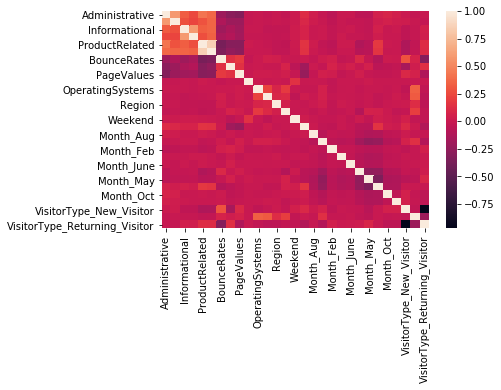

In [31]:
sns.heatmap(correlation_matrix)
plt.show()

In [32]:
# Step 2: Get correlation of all features with the target variable
correlation_with_target = correlation_matrix['Revenue'].drop('Revenue')  # Remove self-correlation
correlation_with_target

Administrative                   0.124711
Administrative_Duration          0.092184
Informational                    0.075171
Informational_Duration           0.068425
ProductRelated                   0.158546
ProductRelated_Duration          0.152217
BounceRates                      0.009486
ExitRates                       -0.181292
PageValues                      -0.232347
SpecialDay                      -0.008728
OperatingSystems                -0.014668
Browser                          0.023984
Region                          -0.011595
TrafficType                     -0.005113
Weekend                          0.029295
Month_Aug                        0.010959
Month_Dec                       -0.033112
Month_Feb                       -0.047114
Month_Jul                       -0.001036
Month_June                      -0.023112
Month_Mar                       -0.063941
Month_May                       -0.078320
Month_Nov                        0.154774
Month_Oct                        0

In [33]:
# Step 3: Get absolute correlations (if you want the strength of correlation regardless of sign)
correlation_with_target_abs = correlation_with_target.abs()
correlation_with_target_abs

Administrative                   0.124711
Administrative_Duration          0.092184
Informational                    0.075171
Informational_Duration           0.068425
ProductRelated                   0.158546
ProductRelated_Duration          0.152217
BounceRates                      0.009486
ExitRates                        0.181292
PageValues                       0.232347
SpecialDay                       0.008728
OperatingSystems                 0.014668
Browser                          0.023984
Region                           0.011595
TrafficType                      0.005113
Weekend                          0.029295
Month_Aug                        0.010959
Month_Dec                        0.033112
Month_Feb                        0.047114
Month_Jul                        0.001036
Month_June                       0.023112
Month_Mar                        0.063941
Month_May                        0.078320
Month_Nov                        0.154774
Month_Oct                        0

In [34]:
# Step 4: Select top 5 features with the highest correlation
top_8_features = correlation_with_target_abs.sort_values(ascending=False).head(8)
top_8_features

PageValues                       0.232347
ExitRates                        0.181292
ProductRelated                   0.158546
Month_Nov                        0.154774
ProductRelated_Duration          0.152217
Administrative                   0.124711
VisitorType_New_Visitor          0.104136
VisitorType_Returning_Visitor    0.103843
Name: Revenue, dtype: float64

In [35]:
top_features = top_8_features.index.to_list()
top_features

['PageValues',
 'ExitRates',
 'ProductRelated',
 'Month_Nov',
 'ProductRelated_Duration',
 'Administrative',
 'VisitorType_New_Visitor',
 'VisitorType_Returning_Visitor']

In [36]:
# Step 2: Create updated training and test sets with only these features
update_X_train = X_train[top_features]
update_X_test = X_test[top_features]

In [37]:
update_X_train.shape, update_X_test.shape

((8631, 8), (3699, 8))

In [38]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(top_features, sol.top_features)

assert_frame_equal(update_X_train, sol.update_X_train)
assert_frame_equal(update_X_test, sol.update_X_test)


In [39]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal('yes', q3_plot_check)


**Part 4: Training a Decision Tree Model**

In [40]:
"""
1. Import the DecisionTreeClassifier from sklearn

2. Create a Decision Tree model with default parameters besides the random state (random_state=42 must be set) and train it on the training data

3. Make predictions on the test set as '"y_pred"
"""

# 2. Create a Decision Tree model with default parameters except for random_state
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(update_X_train, y_train)

# 3. Make predictions on the test set
y_pred = decision_tree.predict(update_X_test)


In [41]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(type(decision_tree), type(sol.decision_tree))
nt.assert_equal(y_pred, sol.y_pred)


**Part 5: Model Evaluation**

In [42]:
"""
1. Calculate and print the accuracy of the model on the test set as "accuracy"

2. Import and generate the confusion matrix as "conf_matrix"

3. Plot the confusion matrix using seaborn's heatmap

NOTE: 
- Your plot cannot be autograded.  
- If you go to the guide, there will be a PDF with the solution plot.
- Please check it and if your answer matches, set the variable q5_plot_check = 'yes' .   

"""

q5_plot_check = 'yes' # change to yes after you verify your plot

# 1. Calculate and print the accuracy

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8532035685320357

In [43]:
# 2. Import and generate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

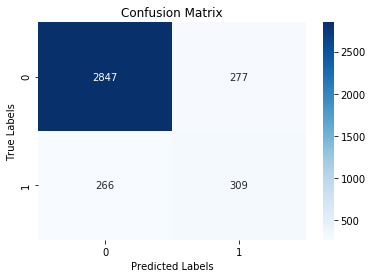

In [44]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [45]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(accuracy, sol.accuracy)


In [46]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal('yes', q5_plot_check)


**Part 6: Experimenting with Different Parameters**

In [47]:
"""
1. Create a new Decision Tree model with different parameters (max_depth = 5, min_samples_split = 50)

2. Train the new model on the training data called "decision_tree_tuned" 
   and make predictions on the test set

3. Evaluate the accuracy of this model and save it in "accuracy_tuned"
"""

# 1. Create a new Decision Tree model with specified parameters


decision_tree_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)

# 2. Train the new model and make predictions
decision_tree_tuned.fit(update_X_train, y_train)
y_pred_tuned = decision_tree_tuned.predict(update_X_test)

# 3. Evaluate and save the accuracy
from sklearn.metrics import accuracy_score
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("accuracy_tuned:", accuracy_tuned)



accuracy_tuned: 0.8967288456339552


In [48]:
##########################
### TEST YOUR SOLUTION ###
##########################

nt.assert_equal(y_pred_tuned, sol.y_pred_tuned)
assert_equal(accuracy_tuned, sol.accuracy_tuned)
